## Selecting our model

I will select suitable metrics that are appropriate for multi-class classification problems and have been used for similar tasks.
the metrics will  : 
 * accuracy score, 
 * confusion matrices (precision, recall, f1_score). 
 
I will fine tune the selection of performance measures depending on whether the distribution of outcome labels is balanced or imbalanced. 



Select modeling tools


The appropriateness of different models based on the task at hand, multi-class classification, taking into account other parameters such as size, shape and other characteristics of the data, training speed.
The classifier models I will try are : 
 * Support Vector Machine 


 SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.


 * Multinomial  Logistic Regression 

 
 Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.


 Logistic regression, by default, is limited to two-class classification problems. Some extensions like one-vs-rest can allow logistic regression to be used for multi-class classification problems, although they require that the classification problem first be transformed into multiple binary classification problems.


 * Random Forest Classifier 


 A random forest is a machine learning technique that's used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. A random forest algorithm consists of many decision trees.

 * Decision Tree 


 Decision tree learning or induction of decision trees is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

 * Knn Neighbors 


 Nearest neighbor classification is a machine learning method that aims at labeling previously unseen query objects while distinguishing two or more destination classes. As any classifier, in general, it requires some training data with given labels and, thus, is an instance of supervised learning.

 * Naives Bayes 


 Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each oth




Implement model

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,  metrics, tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score, confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold,train_test_split 
from sklearn.svm import LinearSVC ,SVC
from sklearn.model_selection import cross_val_predict
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix,DiscriminationThreshold

In [25]:
df1 = pd.read_csv('df_to_scaled.csv',index_col='Unnamed: 0')

In [26]:
df1

,DEPARTMENT,Residence stratum,Number of people in household,A1.1. Enumerator: Register sex; ask only of you are uncertain,A1.2. How old are you?,A.1.3. What is your current marital status?,A.1.4aa What is the highest level of education achieved?,A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport,...,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Internet/online banking transaction,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Mobile banking transaction,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Deposit cash into a bank account,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM,L1.Have you heard about the following mobile money services ? :Lajan Cash,L1.Have you heard about the following mobile money services ? :Mon Cash,L2a. Have you used the Mobile money services of (name of service provider )?:Lajan Cash,L2a. Have you used the Mobile money services of (name of service provider )?:Mon Cash,Y,age_bins
0,9.0,1,5.0,1,43.0,5.0,1.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8
1,9.0,1,7.0,0,28.0,3.0,7.0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,3
2,9.0,1,3.0,0,16.0,1.0,4.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0
3,9.0,1,5.0,1,27.0,1.0,6.0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
4,1.0,1,2.0,0,26.0,1.0,5.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,11.0,0,6.0,0,34.0,2.0,4.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,5
4265,11.0,0,7.0,1,22.0,1.0,4.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1,1
4266,11.0,0,3.0,1,20.0,1.0,5.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
4267,11.0,0,1.0,1,19.0,1.0,4.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1



# Building our model

## Data Preprocessing

In [28]:
# Here we are normalizing all columns in our dataset except the target.
cols_to_scale = df1.columns.difference(['Y'])
scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(df1[cols_to_scale])
df_scaled = pd.DataFrame(df_scaled,columns = df1.columns.difference(['Y']))


## Features Selection

In [27]:
from scipy import stats
from scipy.stats import chi2_contingency
import math


def Cramer(x,y):
    '''
    Calculate Cramers V statistic for categorial-categorial association
    '''
    c_matrix = pd.crosstab(x,y)
    r,k = c_matrix.shape
    n = c_matrix.values.sum()
    chi2,p,dof,e = chi2_contingency(c_matrix)
    phi2 = chi2/n
    phi_hat2 = max(0,phi2 - (k-1)*(r-1)/(n-1))
    k_hat = k - math.pow((k-1),2)/(n-1)
    r_hat = r - math.pow((r-1),2)/(n-1)
    min_r_hat_k_hat = min(r_hat,k_hat)
    v_hat = math.sqrt(phi_hat2/(min_r_hat_k_hat-1))
    return v_hat


cat_features = [col for col in df_scaled.columns if df_scaled[col].nunique() < 50]


collinear = ['L2a. Have you used the Mobile money services of (name of service provider )?:Mon Cash','L2a. Have you used the Mobile money services of (name of service provider )?:Lajan Cash', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Internet/online banking transaction', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Mobile banking transaction',  'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Deposit cash into a bank account', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM','A1.2. How old are you?','A1.2. How old are you?']
reduced_features = [var for var in cat_features if var not in collinear]
df_cat = df_scaled[reduced_features]

v_matrix = pd.DataFrame(index = reduced_features)

for i in df_cat.columns:
    stats = []
    for j in df_cat.columns:
        v_hat = Cramer(df_cat[i],df_cat[j])
        stats.append(v_hat)
    v_matrix[i] = stats

<AxesSubplot:>

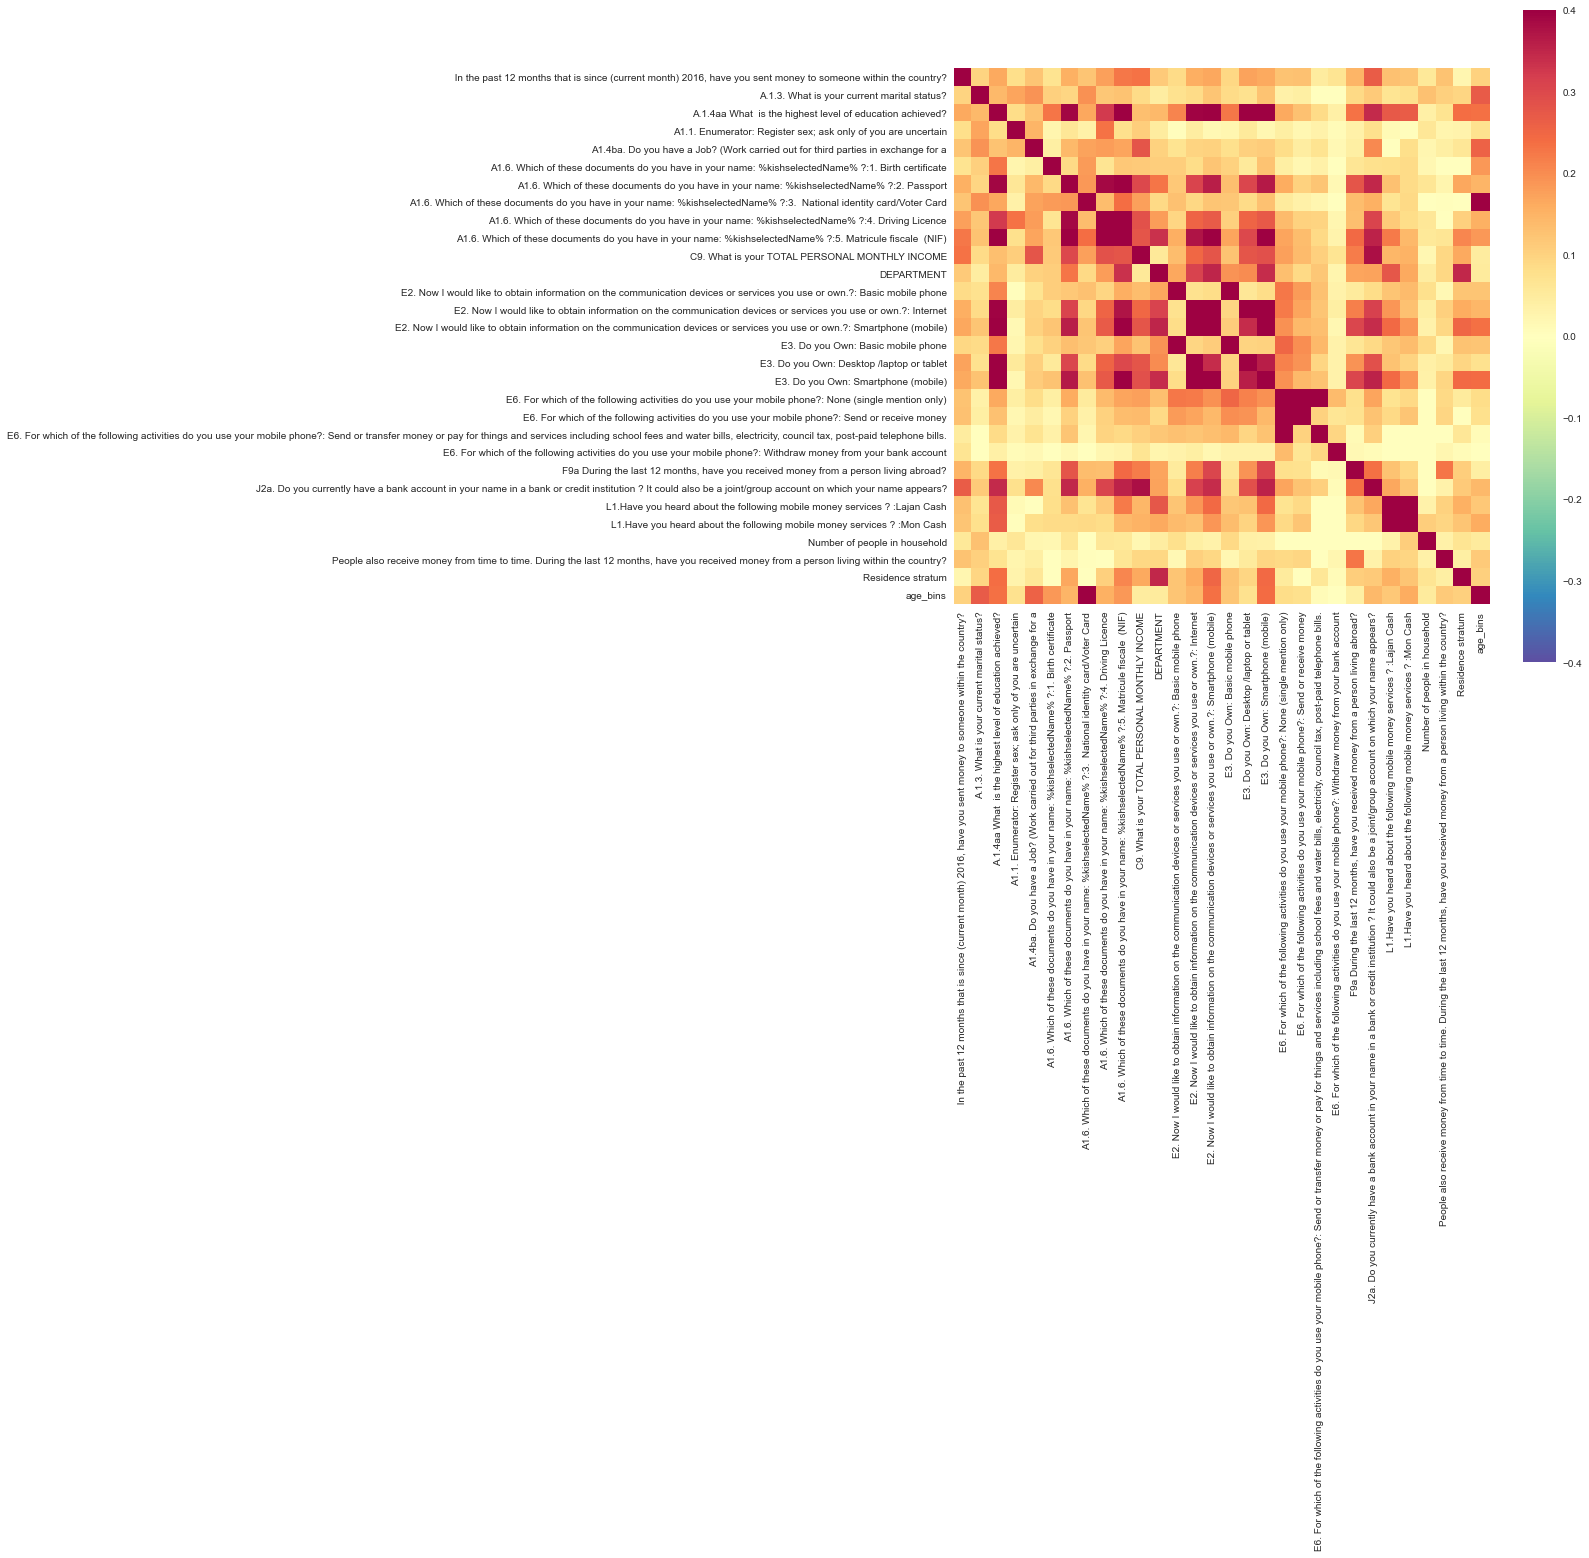

In [44]:
fig = plt.gcf()
fig.set_size_inches(12, 12)
sns.heatmap(v_matrix, cmap='Spectral_r',square=True, vmin=-.4, vmax=.4)

Here, to avoid multicolinearity, we will drop the columns that help us build our target variable.

In [29]:
df_scaled = df_scaled.drop(['L2a. Have you used the Mobile money services of (name of service provider )?:Mon Cash','L2a. Have you used the Mobile money services of (name of service provider )?:Lajan Cash', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Internet/online banking transaction', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Mobile banking transaction',  'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Deposit cash into a bank account', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM','A1.2. How old are you?','A1.2. How old are you?'], axis = 1)

In [30]:

X = df_scaled
y = df1['Y']

In [31]:
X

,"In the past 12 months that is since (current month) 2016, have you sent money to someone within the country?",A.1.3. What is your current marital status?,A.1.4aa What is the highest level of education achieved?,A1.1. Enumerator: Register sex; ask only of you are uncertain,A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:3. National identity card/Voter Card,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:4. Driving Licence,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:5. Matricule fiscale (NIF),...,"E6. For which of the following activities do you use your mobile phone?: Send or transfer money or pay for things and services including school fees and water bills, electricity, council tax, post-paid telephone bills.",E6. For which of the following activities do you use your mobile phone?: Withdraw money from your bank account,"F9a During the last 12 months, have you received money from a person living abroad?",J2a. Do you currently have a bank account in your name in a bank or credit institution ? It could also be a joint/group account on which your name appears?,L1.Have you heard about the following mobile money services ? :Lajan Cash,L1.Have you heard about the following mobile money services ? :Mon Cash,Number of people in household,"People also receive money from time to time. During the last 12 months, have you received money from a person living within the country?",Residence stratum,age_bins
0,0.0,0.8,0.000000,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.0,1.0,0.615385
1,0.0,0.4,1.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.352941,0.0,1.0,0.230769
2,0.0,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.117647,0.0,1.0,0.000000
3,0.0,0.0,0.833333,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,1.0,1.0,0.230769
4,0.0,0.0,0.666667,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,1.0,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,0.0,0.2,0.500000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.294118,0.0,0.0,0.384615
4265,1.0,0.0,0.500000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.352941,0.0,0.0,0.076923
4266,1.0,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.117647,0.0,0.0,0.076923
4267,0.0,0.0,0.500000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.076923


In [32]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

selector = SelectKBest(f_classif, k=25)
selector.fit(X, y)

df_scores = pd.DataFrame(selector.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(15,'Score'))  # print 20 best features
features =df_scaled.columns[selector.get_support()]
X = df_scaled[features]


                                         Feature_Name        Score
23  J2a. Do you currently have a bank account in y...  1293.797190
17                E3. Do you Own: Smartphone (mobile)   388.638011
14  E2. Now I would like to obtain information on ...   388.534795
25  L1.Have you heard about the following mobile m...   348.984267
9   A1.6. Which of these documents do you have in ...   247.853700
13  E2. Now I would like to obtain information on ...   230.688449
2   A.1.4aa What  is the highest level of educatio...   221.845247
16          E3. Do you Own: Desktop /laptop or tablet   207.706895
0    In the past 12 months that is since (current ...   203.087914
6   A1.6. Which of these documents do you have in ...   193.978303
18  E6. For which of the following activities do y...   172.979374
19  E6. For which of the following activities do y...   154.839328
8   A1.6. Which of these documents do you have in ...   154.354172
24  L1.Have you heard about the following mobile m...   117.20

## Splitting the Dataset 

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.30,random_state=456,stratify = y)

### Finding best k for knn classifier


In [34]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

In [35]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 77.36143637782982 and k = [13]


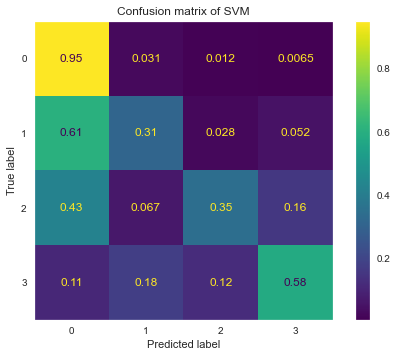

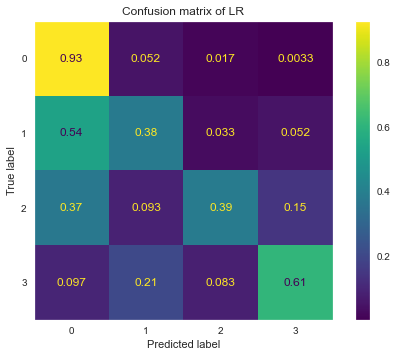

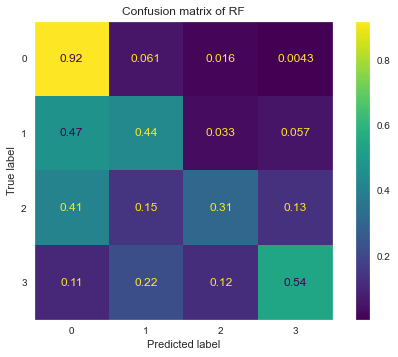

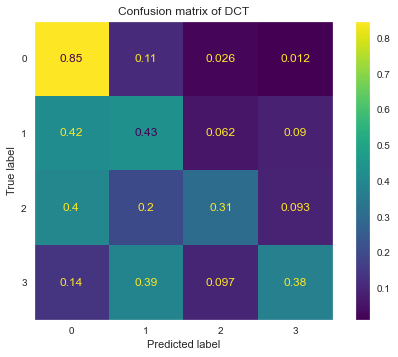

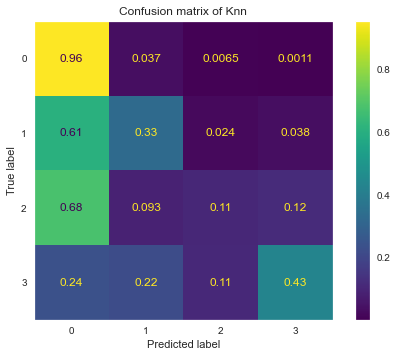

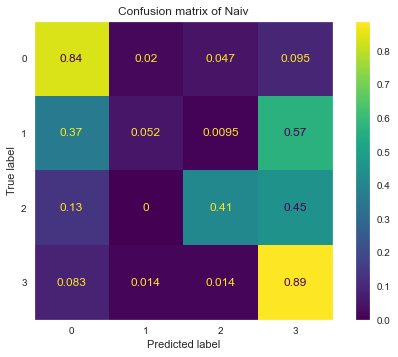

In [36]:

svm_clf = svm.LinearSVC( max_iter= 2900, random_state = 0)
lr_clf = LogisticRegression(max_iter= 2900, random_state = 0)
rf_clf = RandomForestClassifier(random_state = 0)
knn = KNeighborsClassifier(n_neighbors=13)
bayes = GaussianNB()
df_acc = pd.DataFrame()
dec_tree = tree.DecisionTreeClassifier(random_state=0)
import time 
kfold = KFold(n_splits=10 ,random_state=0,shuffle = True) 
moments = ['mean', 'std','time']
models_df = pd.DataFrame(index = moments)
models = {'SVM': svm_clf, 'LR':lr_clf, 'RF': rf_clf,'DCT' :dec_tree, 'Knn' : knn, 'Naiv': bayes} 

for k,v in models.items():
    start = time.time()
    stats = []
    v.fit(X_train,y_train) # Fit the training data to the Model
    end = time.time()
    cv_result = cross_val_score(v, X_train, y_train, cv = kfold, scoring = "accuracy")
    cv_result = cv_result*100
    df_acc[k] = cv_result
    stats.append(cv_result.mean())
    stats.append((cv_result).std())
    stats.append(end-start)
    models_df[k] = stats
    plot_confusion_matrix(v,X_test,y_test,normalize = 'true')
    plt.title('Confusion matrix of {}'.format(k))
    sns.set_style("dark") 

In [37]:
models_df

,SVM,LR,RF,DCT,Knn,Naiv
mean,79.787322,80.189895,79.955444,75.436466,77.042940,68.375233
std,2.088009,2.713937,2.365630,1.911859,2.180586,2.452931
time,0.449112,0.520125,1.001245,0.027007,0.005121,0.009000


What is the AUC - ROC Curve?


AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

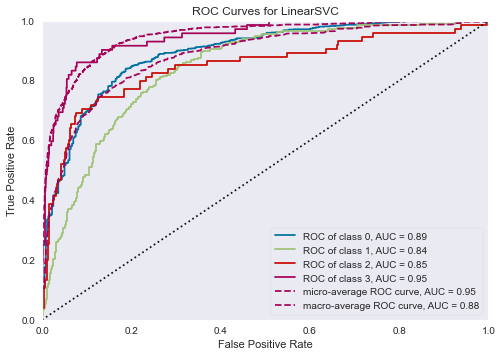

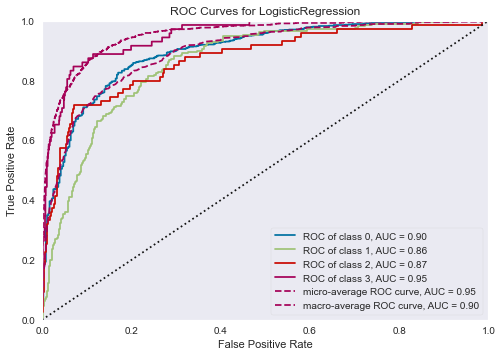

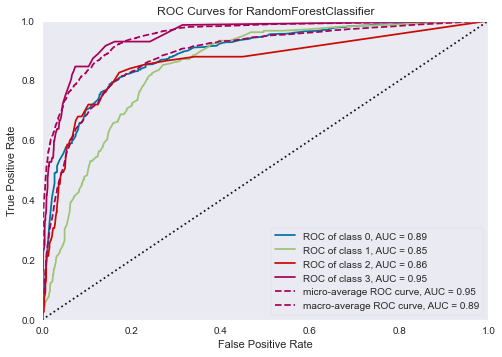

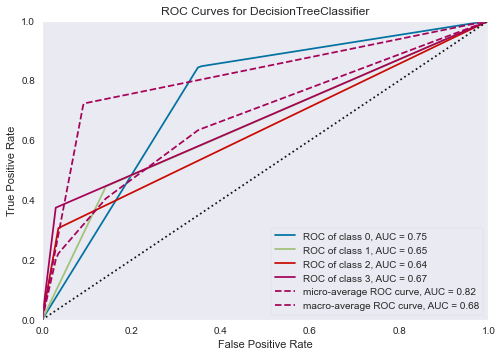

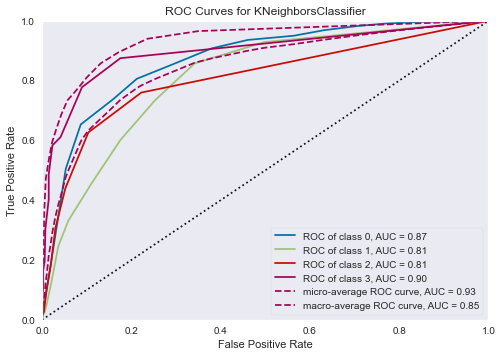

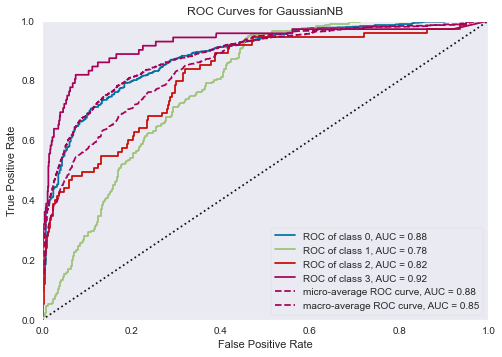

In [38]:
for k,v in models.items ( ) : 
    visualizer = ROCAUC(v)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
    g = visualizer.show()

In [39]:
for k,v in models.items():
    print(k)
    y_predict = v.predict(X_test)
    print(metrics.classification_report(y_test, y_predict, digits=3)) 

SVM
              precision    recall  f1-score   support

           0      0.839     0.950     0.891       923
           1      0.584     0.313     0.407       211
           2      0.500     0.347     0.409        75
           3      0.592     0.583     0.587        72

    accuracy                          0.789      1281
   macro avg      0.629     0.548     0.574      1281
weighted avg      0.763     0.789     0.766      1281

LR
              precision    recall  f1-score   support

           0      0.853     0.927     0.888       923
           1      0.533     0.379     0.443       211
           2      0.500     0.387     0.436        75
           3      0.638     0.611     0.624        72

    accuracy                          0.788      1281
   macro avg      0.631     0.576     0.598      1281
weighted avg      0.767     0.788     0.774      1281

RF
              precision    recall  f1-score   support

           0      0.859     0.919     0.888       923
           

Over Sampling our Trainig Data to improve our Recall



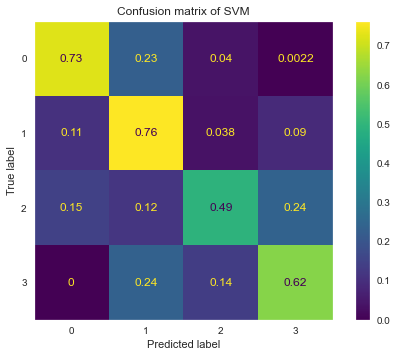

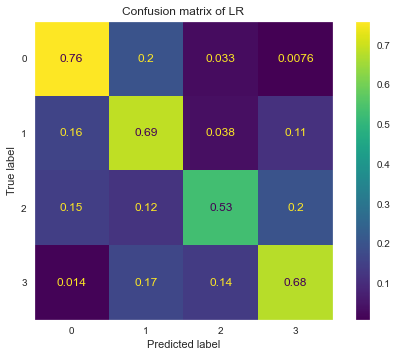

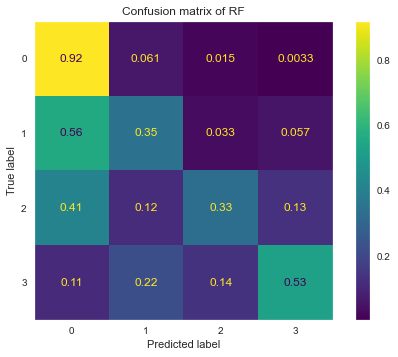

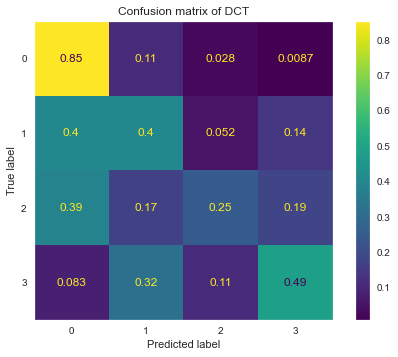

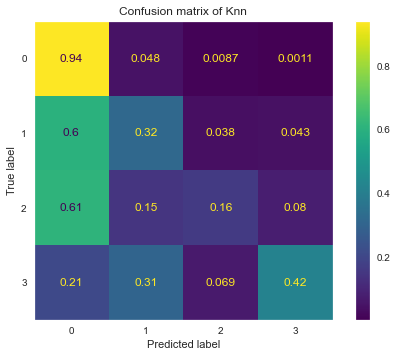

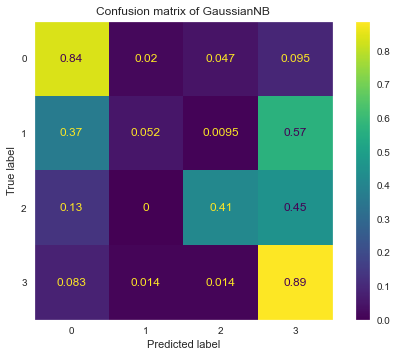

In [40]:
svm_clf = SVC( max_iter= 2900,class_weight = 'balanced')
lr_clf = LogisticRegression(max_iter= 2900,class_weight = 'balanced')
rf_clf = RandomForestClassifier(random_state = 5,class_weight = 'balanced')
knn = KNeighborsClassifier(n_neighbors=7)
bayes = GaussianNB()
df_acc = pd.DataFrame()
dec_tree = tree.DecisionTreeClassifier(random_state=5,class_weight = 'balanced')

kfold = KFold(n_splits=15 ,random_state=0,shuffle = True)
moments = ['mean', 'std','time']
models_df = pd.DataFrame(index = moments)
models = {'SVM': svm_clf, 'LR':lr_clf, 'RF': rf_clf,'DCT' :dec_tree, 'Knn' : knn, 'GaussianNB': bayes} 

for k,v in models.items():
    start = time.time()
    stats = []
    v.fit(X_train,y_train)
    end = time.time()
    cv_result = cross_val_score(v, X_train, y_train, cv = kfold, scoring = "accuracy")
    cv_result = cv_result*100
    df_acc[k] = cv_result
    stats.append(cv_result.mean())
    stats.append((cv_result).std())
    stats.append(end-start)
    models_df[k] = stats
    plot_confusion_matrix(v,X_test,y_test,normalize = 'true')
    plt.title('Confusion matrix of {}'.format(k))
    

In [41]:
models_df

,SVM,LR,RF,DCT,Knn,GaussianNB
mean,72.924623,73.561642,79.586600,74.129313,77.311558,68.308208
std,1.523631,2.204450,3.211707,2.937813,2.874826,3.680899
time,1.107266,1.489353,0.778193,0.028007,0.004994,0.011002


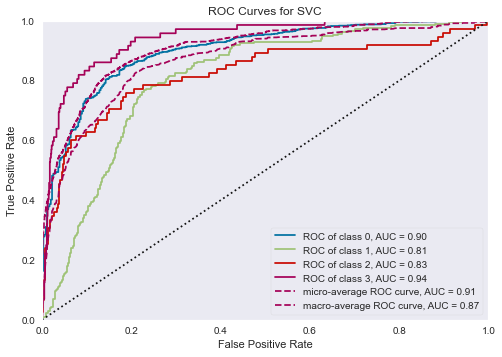

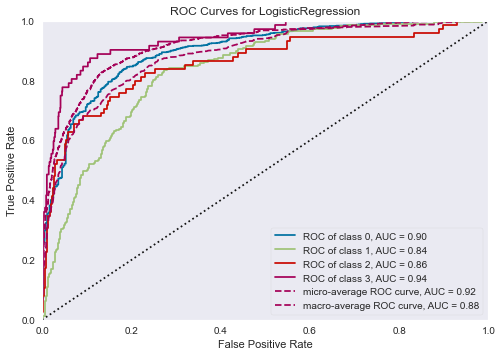

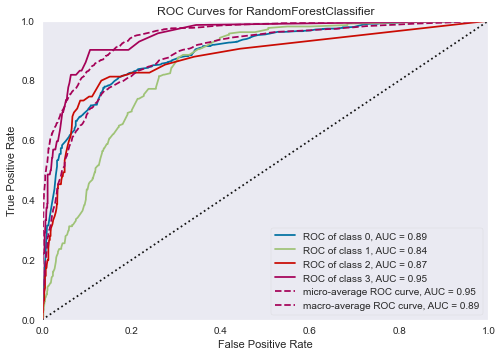

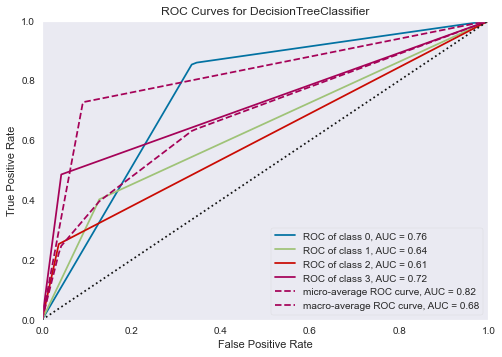

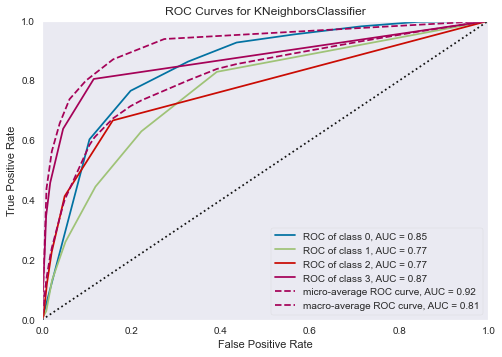

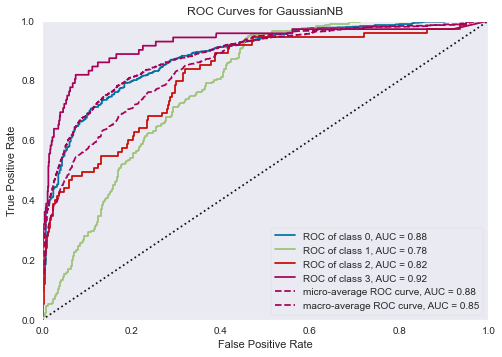

In [42]:
for k,v in models.items ( ) : 
    visualizer = ROCAUC(v)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
    g = visualizer.show()

In [43]:
for k,v in models.items():
    print(k)
    y_predict = v.predict(X_test)
    print(metrics.classification_report(y_test, y_predict, digits=3)) 

SVM
              precision    recall  f1-score   support

           0      0.952     0.726     0.824       923
           1      0.401     0.763     0.526       211
           2      0.402     0.493     0.443        75
           3      0.536     0.625     0.577        72

    accuracy                          0.713      1281
   macro avg      0.573     0.652     0.592      1281
weighted avg      0.806     0.713     0.738      1281

LR
              precision    recall  f1-score   support

           0      0.939     0.761     0.840       923
           1      0.414     0.687     0.517       211
           2      0.455     0.533     0.491        75
           3      0.516     0.681     0.587        72

    accuracy                          0.731      1281
   macro avg      0.581     0.665     0.609      1281
weighted avg      0.800     0.731     0.752      1281

RF
              precision    recall  f1-score   support

           0      0.844     0.921     0.881       923
           